### OPTION 1.  PYBER
### Find relationship between four key variables:
    # Average Fare Per City
    # Total Number of Rides Per City
    # Total Number of Drivers Per City
    # City Type (Urban, Suburban, Rural)
### Produce pie charts on the following:
    # % of Total Fares by City Type
    # % of Total Rides by City Type
    # % of Total Drivers by City Type

In [265]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [266]:
datafile1 = "raw_data/ride_data.csv"
datafile2 = "raw_data/city_data.csv"

df1 = pd.read_csv(datafile1)
df2 = pd.read_csv(datafile2)

df1 = df1.sort_values(["city"], ascending = True)
df2 = df2.sort_values(["city"], ascending = True)

In [267]:
# Merge the two files on "city."  Find mean.
df = pd.merge(df1, df2, on = "city", how = "outer")
df.head()

,city,date,fare,ride_id,driver_count,type
0,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
1,Alvarezhaven,2016-01-21 07:25:48,22.83,3565582370530,21,Urban
2,Alvarezhaven,2016-06-21 09:57:52,20.88,9456788060940,21,Urban
3,Alvarezhaven,2016-05-16 15:33:14,6.45,8939751998750,21,Urban
4,Alvarezhaven,2016-06-25 22:46:06,24.16,9047320468692,21,Urban


### BUBBLE PLOT OF RIDE SHARING DATA.

In [269]:
# Find mean.
df3 = df.sort_values(by = ["city", "type"], ascending = [True, True])
df4 = df3[["city", "type", "fare"]]
df4.head()

,city,type,fare
0,Alvarezhaven,Urban,6.42
1,Alvarezhaven,Urban,22.83
2,Alvarezhaven,Urban,20.88
3,Alvarezhaven,Urban,6.45
4,Alvarezhaven,Urban,24.16


In [270]:
# Get data, format it.
df4_mean = df4.groupby(["city", "type"]).mean()
df4_mean["count"] = df4.groupby(["city", "type"]).count()
df4_mean = df4_mean.reset_index()

df4_mean["type"] = df4_mean["type"].replace(["Urban", "Suburban", "Rural"], [1, 2, 3])
df4_mean["type"]

df4_mean.head()

,city,type,fare,count
0,Alvarezhaven,1,23.928710,31
1,Alyssaberg,1,20.609615,26
2,Anitamouth,2,37.315556,9
3,Antoniomouth,1,23.625000,22
4,Aprilchester,1,21.981579,19


In [271]:
list_type = list(df4_mean["type"])
list_count = list(df4_mean["count"])
list_fare = list(df4_mean["fare"])

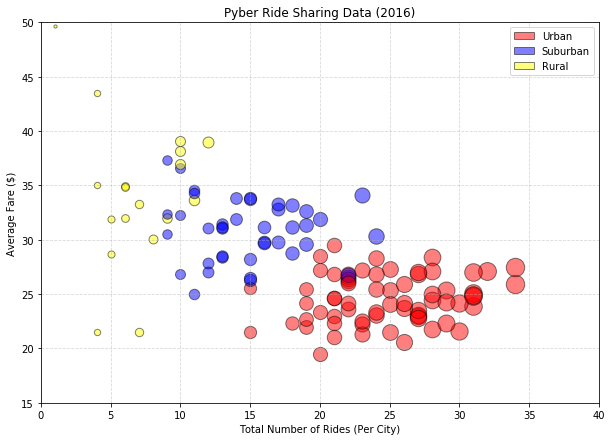

In [272]:
# Make the scatterplot.
plt.figure(figsize=(10, 7))

for x in range(len(list_type)):
    if list_type[x] == 1:
        x = plt.scatter(list_count[x], list_fare[x], facecolors = "red", marker = "o",
                   edgecolors = "black", alpha = 0.5, s = list_count[x] * 10)
    elif list_type[x] == 2:
        y = plt.scatter(list_count[x], list_fare[x], facecolors = "blue", marker = "o",
                    edgecolors = "black", alpha = 0.5, s = list_count[x] * 10)
    elif list_type[x] == 3:
        z = plt.scatter(list_count[x], list_fare[x], facecolors = "yellow", marker = "o",
                   edgecolors = "black", alpha = 0.5, s = list_count[x] * 10)

        
classes = ["Urban", "Suburban", "Rural"]
class_colors = ["red", "blue", "yellow"]
recs = []

for i in range(0, len(class_colors)):
    recs.append(mpatches.Circle((.4, .4), radius = 0.2, fc = class_colors[i], ec = "black",
                               alpha = 0.5))
        
plt.legend(recs, classes, loc = 0)

plt.xlim(0, 40)
plt.ylim(15, 50)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(linestyle= "--", alpha = 0.5)
plt.show()

### TOTAL RIDES BY CITY TYPE.

In [274]:
fares = df4.groupby(["type"])
fares = fares["fare"].sum()
fares = pd.DataFrame(fares)
fares

,fare
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


In [275]:
urban1 = fares["fare"][2]
suburban1 = fares["fare"][1]
rural1 = fares["fare"][0]

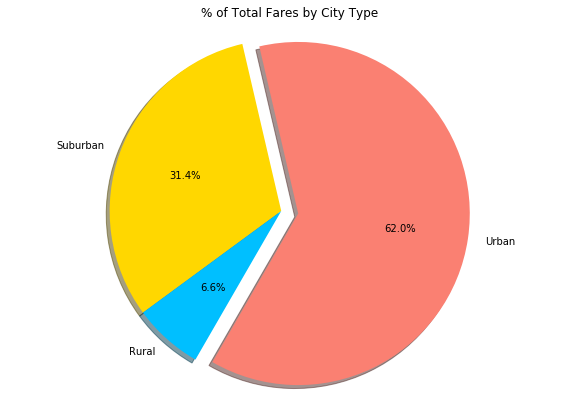

In [276]:
# Set up the pie chart.
labels1 = ["Urban", "Suburban", "Rural"]
sizes1 = [urban1, suburban1, rural1]
colors1 = ["salmon", "gold", "deepskyblue"]
explode1 = (0.1, 0, 0)

plt.figure(figsize=(10, 7))
plt.pie(sizes1, explode = explode1, labels = labels1, colors = colors1, autopct = "%1.1f%%",
       shadow = True, startangle = 240)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

### TOTAL RIDES BY CITY TYPE.

In [278]:
df3.head()
rides = df4["type"].value_counts()
rides = pd.DataFrame(rides)
rides.head()

,type
Urban,1625
Suburban,657
Rural,125


In [279]:
urban2 = rides["type"][0]
suburban2 = rides["type"][1]
rural2 = rides["type"][2]

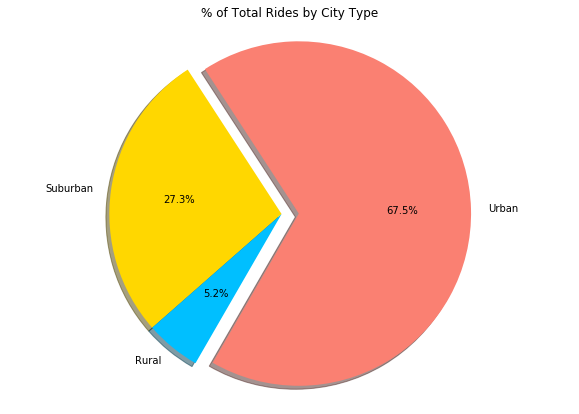

In [280]:
# Set up the pie chart.
labels2 = ["Urban", "Suburban", "Rural"]
sizes2 = [urban2, suburban2, rural2]
colors2 = ["salmon", "gold", "deepskyblue"]
explode2 = (0.1, 0, 0)

plt.figure(figsize=(10, 7))
plt.pie(sizes2, explode = explode2, labels = labels2, colors = colors2, autopct = "%1.1f%%",
       shadow = True, startangle = 240)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

### TOTAL DRIVERS BY CITY TYPE.

In [282]:
df5 = df3[["city", "driver_count", "type"]]
df6 = df5.drop_duplicates(subset = ["city", "type"])
df6 = df6.sort_values(["type"], ascending = False)
df6.head()

,city,driver_count,type
0,Alvarezhaven,21,Urban
834,Maryside,20,Urban
1578,Sarabury,46,Urban
1551,Sandymouth,11,Urban
1528,Russellport,9,Urban


In [283]:
driver_counts = df6.groupby(["type"])
driver_counts = driver_counts["driver_count"].sum()
driver_counts = pd.DataFrame(driver_counts)
driver_counts.head()

,driver_count
type,
Rural,104
Suburban,635
Urban,2607


In [284]:
urban3 = driver_counts["driver_count"][2]
suburban3 = driver_counts["driver_count"][1]
rural3 = driver_counts["driver_count"][0]

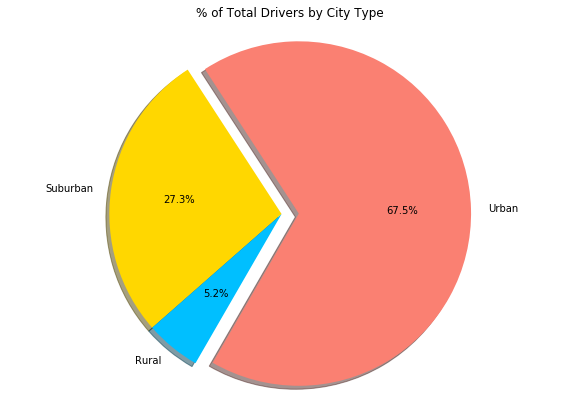

In [285]:
# Set up the pie chart.
labels3 = ["Urban", "Suburban", "Rural"]
sizes3 = [urban3, suburban3, rural3]
colors3 = ["salmon", "gold", "deepskyblue"]
explode3 = (0.1, 0, 0)

plt.figure(figsize=(10, 7))
plt.pie(sizes2, explode = explode2, labels = labels2, colors = colors2, autopct = "%1.1f%%",
       shadow = True, startangle = 240)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()

### Summary.
    # Average fares in urban cities are lower in comparison to average fares in either rural
      or suburban cities.  Interestingly, the overall number of rides in urban areas are
      high in number.  
    
    # Urban areas have the highest number of fares, rides, and drivers.  This makes sense!
      The number of rides require a corresponding high number of drivers.  Also, while the
      collected fares are lower, indicating shorter rides, there are more people in urban
      areas that need to travel shorter distances.  Additionally, there is limited space/money 
      to park cars in the vicinity.  
    
    # The lower numbers established in the rural and suburban areas indicate that people 
      are more reliant on their own cars as they are not limited by space/funds to keep a car
      in an urban area.  Riders in rural cities travel the greatest distance, but use the ride
      share service with much lower frequency.